## Sending Email with Python
    STEPS:
        Connecting to email server 
        Confirm Connection
        Setting a protocol
        Logging on
        Send the Message
        
    Python has smtplib
    
####    Each major email provider has their own SMTP(Simple Mail Transfer Protocol) server
    Gmail - smtp.gmail.com (Will need App Password)
    Yahoo Mail - smtp.mail.yahoo.com
    Outlook.com/Hotmail.com - smtp-mail.outlook.com
    At&T - smtp.mail.att.net (Use port 465)
    Verizon - smtp.verizon.net (Use port 465)
    Comcast - smtp.comcast.net

In [1]:
import smtplib

In [11]:
smtp_object = smtplib.SMTP('smtp.gmail.com', 587)  # TLS Encryption

In [12]:
smtp_object.ehlo()

(250,
 b'smtp.gmail.com at your service, [2409:4062:2d80:5309:21bf:7f1:980:e879]\nSIZE 35882577\n8BITMIME\nSTARTTLS\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

In [13]:
smtp_object.starttls()

(220, b'2.0.0 Ready to start TLS')

In [5]:
password = input('what is your password: ')

what is your password: 13


In [6]:
import getpass

In [7]:
password = getpass.getpass('Pasword Please! ')

Pasword Please! ········


In [8]:
password

'afadsjvnjb'

#### Note for Gmail Users, you need to generate an app password instead of your normal email password. This also requires enabling 2-step authentication. Follow the instructions here to set-up 2-Step Factor Authentication as well as App Password Generation:https://support.google.com/accounts/answer/185833?hl=en/. 

#### Set-up 2 Factor Authentication, then create the App Password, choose Mail as the App and give it any name you want. This will output a 16 letter password for you. Pass in this password as your login password for the smtp.

    
    Generated Password - hgbqdxpyhbebensb

In [14]:
email = getpass.getpass("Email: ")
password = getpass.getpass("Password: ")

smtp_object.login(email,password)

Email: ········
Password: ········


(235, b'2.7.0 Accepted')

In [15]:
from_address = email
to_address = email
subject = input("Enter the subject line: ")
message = input("enter the body message: ")

msg = "Subject: "+" "+subject+"\n"+message

smtp_object.sendmail(from_address, to_address, msg)

Enter the subject line: From Python Script
enter the body message: Hello, This mail is from python Script


{}

In [16]:
smtp_object.quit()

(221, b'2.0.0 closing connection bv17sm3546526pjb.12 - gsmtp')

## Receiving Email with Python
### imaplib and email

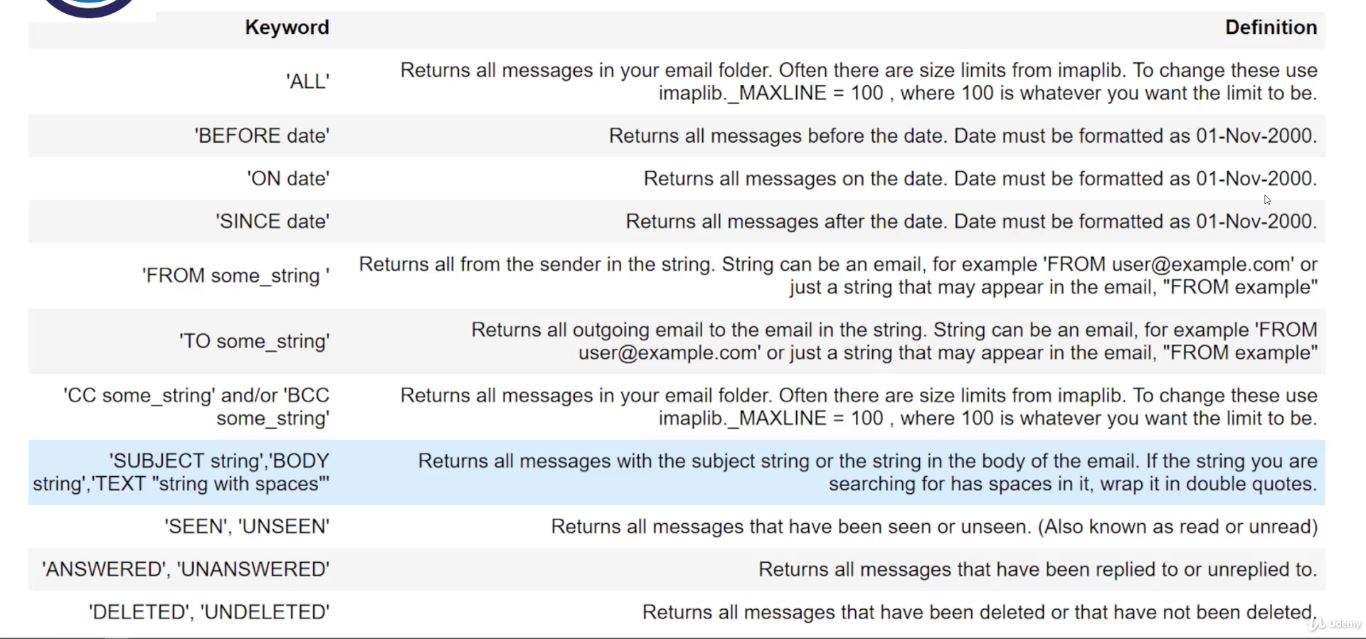

In [38]:
# SYNTAX

from PIL import Image

syntax = Image.open("Syntax.JPG")
syntax

In [17]:
import imaplib

In [18]:
M = imaplib.IMAP4_SSL('imap.gmail.com')

In [19]:
import getpass

In [20]:
email = getpass.getpass('Email: ')
password = getpass.getpass("Password: ")  # APP PASSWORD

Email: ········
Password: ········


In [21]:
M.login(email, password)

('OK', [b'debiprasadmishra50@gmail.com authenticated (Success)'])

In [22]:
M.list()

('OK',
 [b'(\\HasNoChildren) "/" "INBOX"',
  b'(\\HasNoChildren) "/" "Unwanted"',
  b'(\\HasChildren \\Noselect) "/" "[Gmail]"',
  b'(\\All \\HasNoChildren) "/" "[Gmail]/All Mail"',
  b'(\\Drafts \\HasNoChildren) "/" "[Gmail]/Drafts"',
  b'(\\HasNoChildren \\Important) "/" "[Gmail]/Important"',
  b'(\\HasNoChildren \\Sent) "/" "[Gmail]/Sent Mail"',
  b'(\\HasNoChildren \\Junk) "/" "[Gmail]/Spam"',
  b'(\\Flagged \\HasNoChildren) "/" "[Gmail]/Starred"',
  b'(\\HasNoChildren \\Trash) "/" "[Gmail]/Trash"'])

In [23]:
M.select('inbox')

('OK', [b'17292'])

In [24]:
typ,data = M.search(None, 'SUBJECT "From Python Script"')

In [25]:
typ

'OK'

In [28]:
data

[b'17292']

In [29]:
email_id = data[0]

In [30]:
result, email_data = M.fetch(email_id,'(RFC822)')

In [31]:
email_data

[(b'17292 (RFC822 {608}',
  b'Bcc: debiprasadmishra50@gmail.com\r\nReturn-Path: <debiprasadmishra50@gmail.com>\r\nReceived: from [192.168.56.1] ([2409:4062:2d80:5309:21bf:7f1:980:e879])\r\n        by smtp.gmail.com with ESMTPSA id bv17sm3546526pjb.12.2020.11.25.08.24.29\r\n        for <debiprasadmishra50@gmail.com>\r\n        (version=TLS1_3 cipher=TLS_AES_256_GCM_SHA384 bits=256/256);\r\n        Wed, 25 Nov 2020 08:24:30 -0800 (PST)\r\nMessage-ID: <5fbe853e.1c69fb81.d46c4.87a6@mx.google.com>\r\nDate: Wed, 25 Nov 2020 08:24:30 -0800 (PST)\r\nFrom: debiprasadmishra50@gmail.com\r\nSubject:  From Python Script\r\n\r\nHello, This mail is from python Script\r\n'),
 b')']

In [32]:
raw_email = email_data[0][1]

In [33]:
raw_email_string = raw_email.decode('utf-8')

In [34]:
import email

In [35]:
email_message = email.message_from_string(raw_email_string)

In [36]:
email_message

In [37]:
for part in email_message.walk():
    
    if part.get_content_type() == 'text/plain':   # CAN DO text/html
        body = part.get_payload(decode=True)
        print(body)

b'Hello, This mail is from python Script\r\n'
